Importing Libraries

In [60]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk(r"D:\Download\Task-2\Mall Customer Segmentation Data\Mall_Customers.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Reading Dataset

In [61]:
df=pd.read_csv(r"D:\Download\Task-2\Mall Customer Segmentation Data\Mall_Customers.csv")

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [64]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [68]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [69]:
df=df.iloc[:,1:]

In [70]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [71]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [72]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

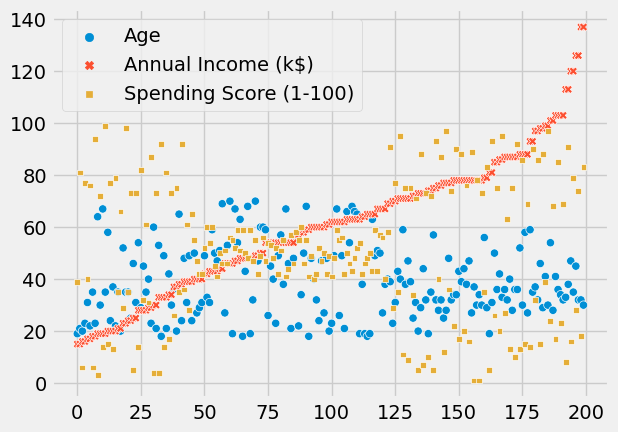

In [73]:
sns.scatterplot(data=df)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

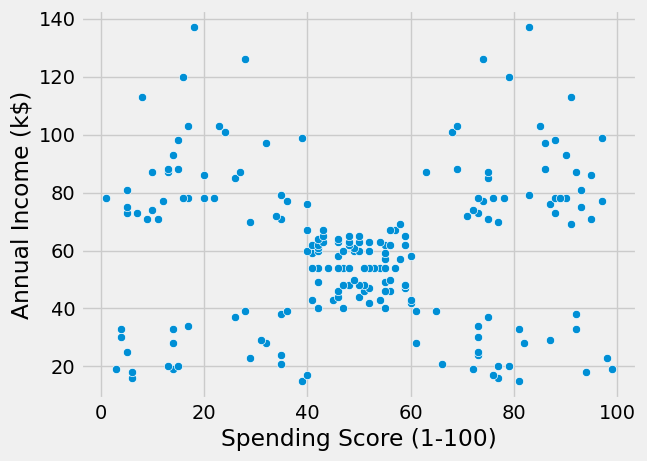

In [74]:
sns.scatterplot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)")

<Axes: xlabel='Age', ylabel='Count'>

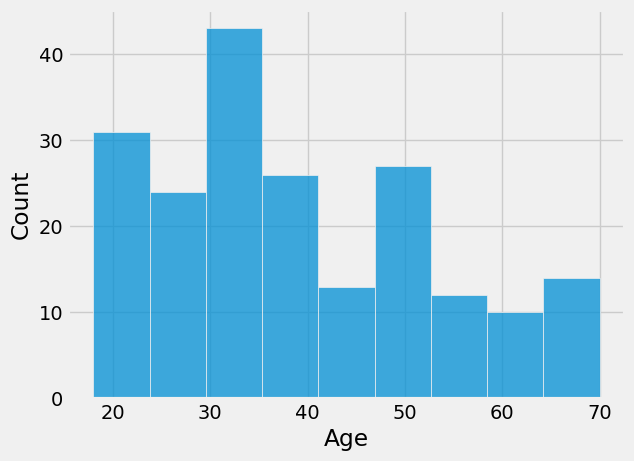

In [75]:
sns.histplot(data=df,x="Age")

<Axes: xlabel='Gender', ylabel='Count'>

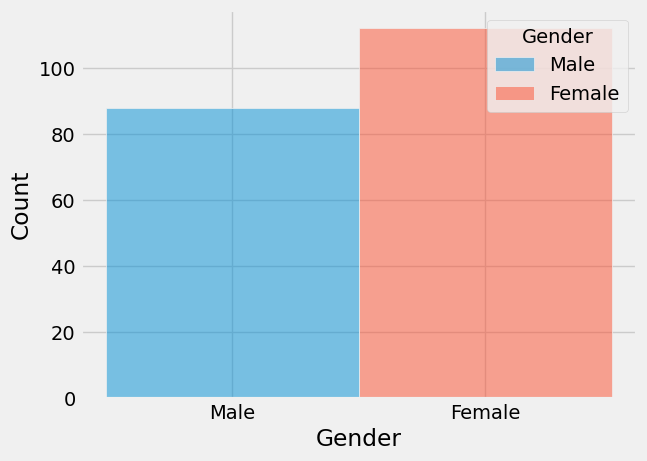

In [76]:
sns.histplot(data=df,x="Gender",hue="Gender")

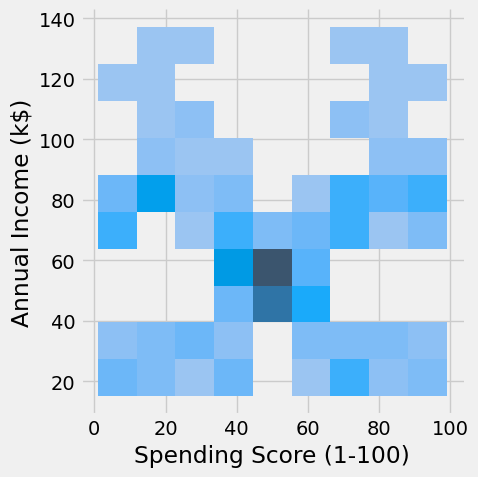

In [77]:
sns.displot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

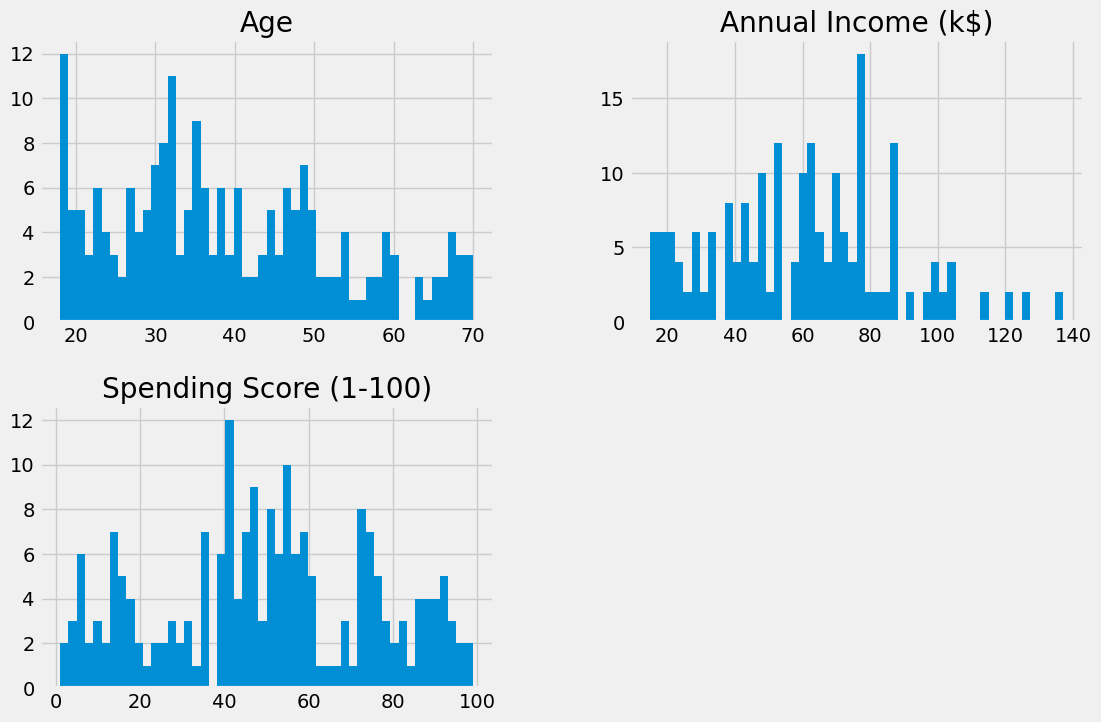

In [78]:
df.hist(bins=50,figsize=(12,8))

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>],
       [<Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>]],
      dtype=object)

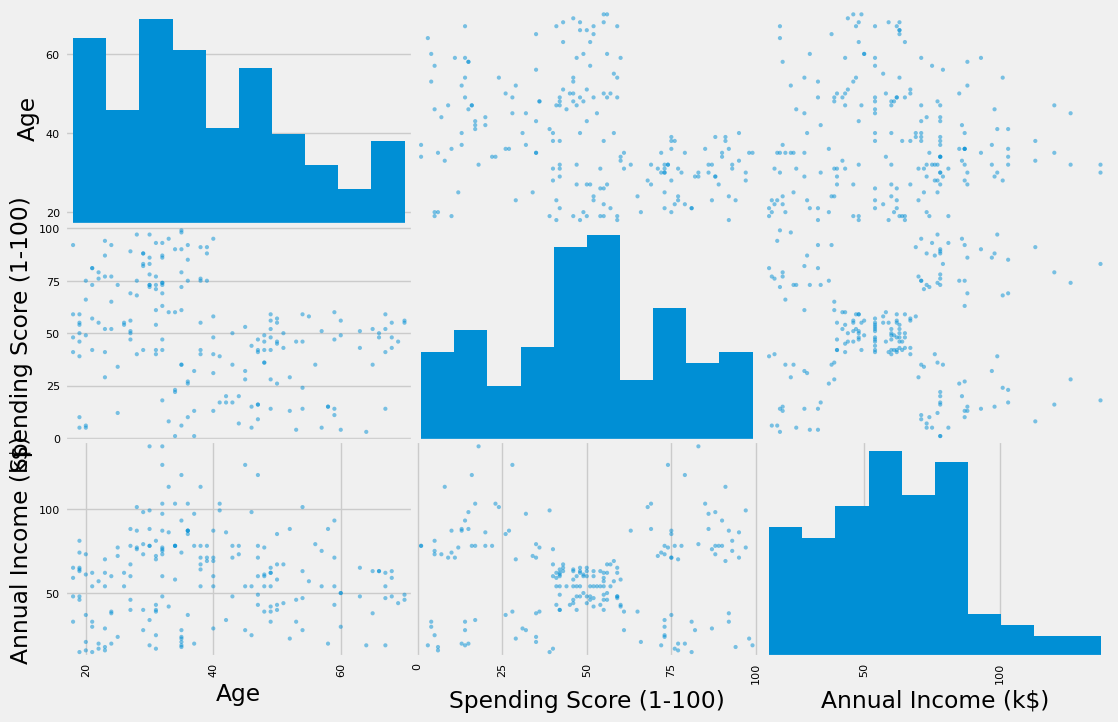

In [79]:
from pandas.plotting import scatter_matrix
attributes=["Age","Spending Score (1-100)","Annual Income (k$)"]
scatter_matrix(df[attributes],figsize=(12,8))

In [80]:
from sklearn.cluster import KMeans

In [81]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    sse.append(km.inertia_)

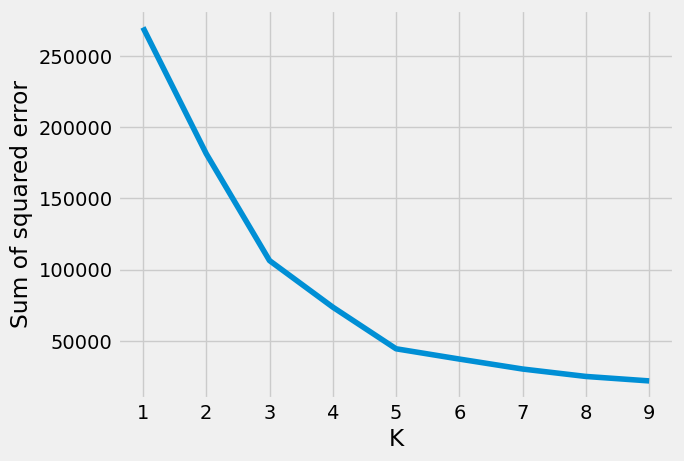

In [82]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [83]:
clf=KMeans(n_clusters=5)

In [84]:
y_predicted = km.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])
y_predicted

array([7, 0, 3, 0, 7, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 7, 0, 7, 0, 7, 0,
       3, 0, 3, 0, 7, 0, 7, 0, 3, 0, 3, 0, 3, 0, 3, 0, 7, 0, 7, 0, 7, 5,
       7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 6, 1, 6, 4, 6, 4, 6,
       1, 6, 4, 6, 4, 6, 4, 6, 4, 6, 1, 6, 4, 6, 1, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 1, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2,
       8, 2])

In [85]:
df['cluster']=y_predicted
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,7
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,7


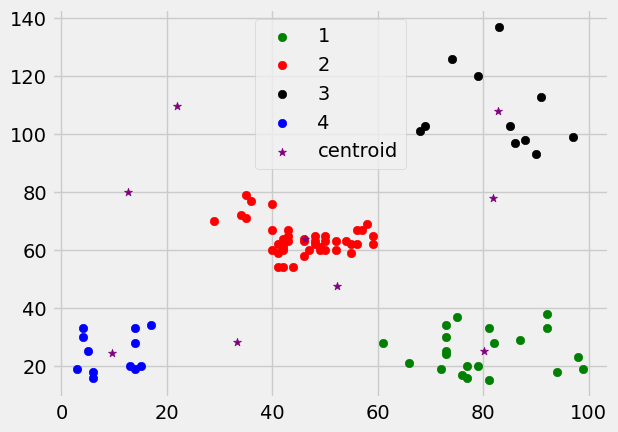

In [86]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'] ,color='green',label='1')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'] ,color='red',label='2')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'] ,color='black',label='3')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='blue',label='4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()